# Uniswap exchange simulator

Uniswap trading formula:
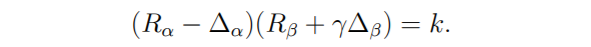

In [1]:
BNB = 1
Ra = 100 * BNB
Rb  = 1000000
k = Ra*Rb

def init():
    global Rb 
    global Ra
    global k
    BNB = 1
    Ra = 100 * BNB
    Rb  = 1000000
    k = Ra*Rb


In [2]:
from sympy.solvers import solve
from sympy import Symbol

def buy(bnb = 0):
    global Rb 
    global Ra
    global k
    deltaB = Symbol('deltaB')
    
    token =solve((Ra + bnb)*(Rb - deltaB)-k,deltaB)
    
    token =float(token[0])
    Ra = Ra+bnb
    Rb= Rb-token
    k = Ra*Rb
    return token

def sell(token = 0):
    global Rb 
    global Ra
    global k
    bnb = Symbol('bnb')
    
    bnb =solve((Ra - bnb)*(Rb + token)-k,bnb)
    
    bnb =float(bnb[0])
    Ra = Ra-bnb
    Rb= Rb+token
    k = Ra*Rb
    return bnb



In [4]:
#buying selling
init()
token = buy(1)
print("buying for 1 bnb will give this many tokens : ",token)
bnb =sell(token)
print("selling thos tokens back will give this many BNB : ",bnb)

buying for 1 bnb will give this many tokens :  9900.990099009901
selling thos tokens back will give this many BNB :  1.0


In [5]:
#price going up
token = buy(1)
buy(1),buy(1),buy(1),buy(1),buy(1)
bnb =sell(token)
print("selling thos tokens back will give this many BNB : ",bnb)

selling thos tokens back will give this many BNB :  1.1009210268469536


In [18]:
#small investor half-pull
init()
token = buy(1)
print("buying for 1 bnb will give this many tokens : ",token)
Ra = Ra/2
Rb = Rb/2
k = Ra*Rb
bnb = sell(token)
print("selling thos tokens back will give this many BNB : ",bnb)

buying for 1 bnb will give this many tokens :  9900.990099009901
selling thos tokens back will give this many BNB :  0.9901960784313725


In [7]:
#Large investor half-pull
init()
token = buy(100)
print("buying for 1 bnb will give this many tokens : ",token)
Ra = Ra/2
Rb = Rb/2
k = Ra*Rb
print("selling thos tokens back will give this many BNB : ",sell(token))

buying for 1 bnb will give this many tokens :  500000.0
selling thos tokens back will give this many BNB :  66.66666666666667


In [9]:
#Large investor half-pull with soft rug
init()
token = buy(1)
print("buying for 1 bnb will give this many tokens : ",token)
Ra = Ra/2
Rb = Rb/2
k = Ra*Rb
sell(Rb)
print("selling thos tokens back will give this many BNB : ",sell(token))

buying for 1 bnb will give this many tokens :  9900.990099009901
selling thos tokens back will give this many BNB :  0.25


In [20]:
#Very slow soft rug
init()
token = buy(1)
print("buying for 1 bnb will give this many tokens : ",token)
print("LP value in BNB: " , Ra)
Ra = Ra*0.99
Rb = Rb*0.99
k = Ra*Rb
print("they made a profit of : " , sell(Rb*0.01) + Ra*0.01)
print("LP value BNB: " , Ra)
print("selling thos tokens back will give this many BNB : ",sell(token))

buying for 1 bnb will give this many tokens :  9900.990099009901
LP value in BNB:  101
they made a profit of :  1.98
LP value BNB:  99.0
selling thos tokens back will give this many BNB :  0.9802950787206741
